This notebook is used to test and visualize the code and data associated with this project. Beyond testing using this notebook, the less exposed sections of the code were tested using the python debugger (pdb) module using break points inserted into key portions of the code. Since hard-coded break points are undesirable for excuting the entire model, they were removed after the code was tested.

In [1]:
import numpy as np
from scipy import signal, fftpack, optimize
import matplotlib.pyplot as plt
import time
import util
import foe
FoE = foe.FoE()

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


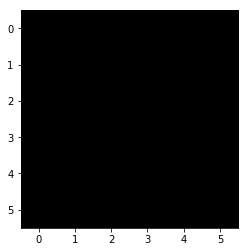

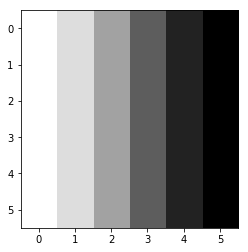

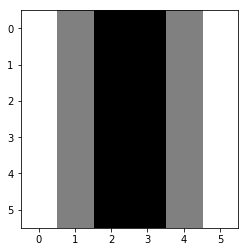

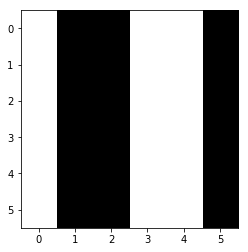

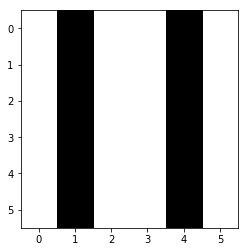

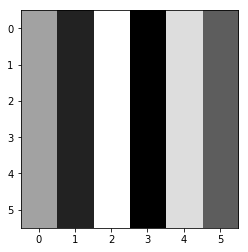

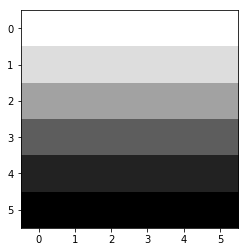

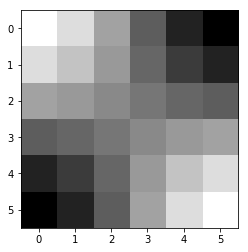

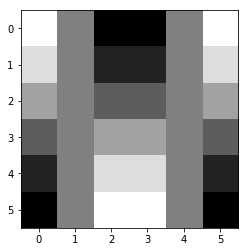

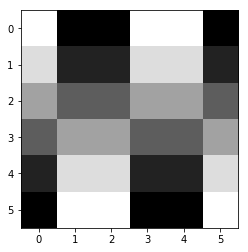

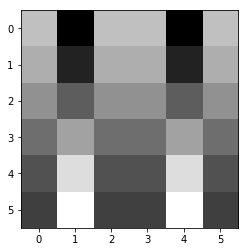

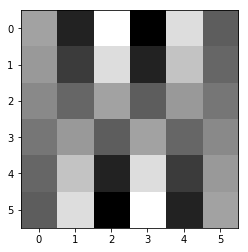

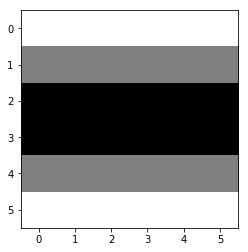

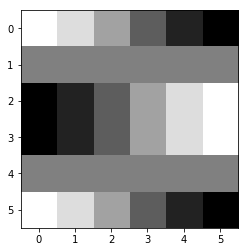

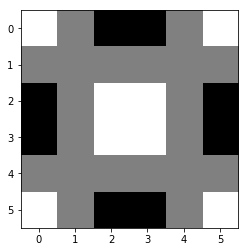

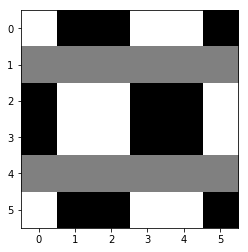

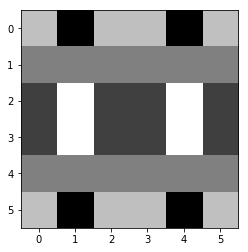

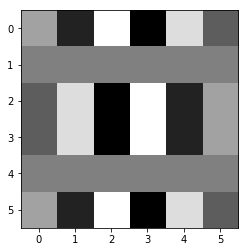

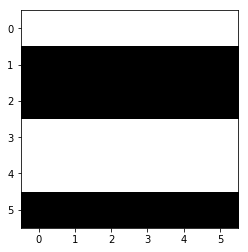

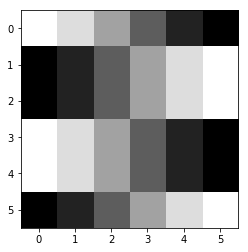

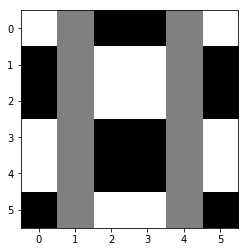

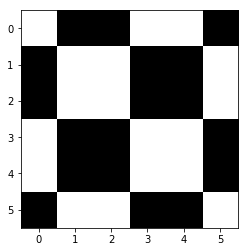

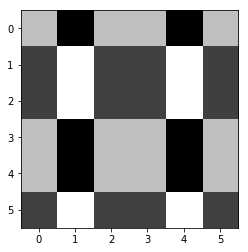

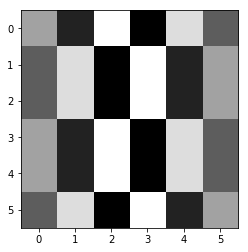

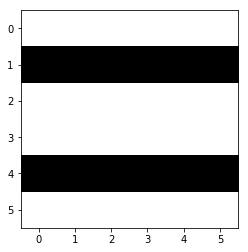

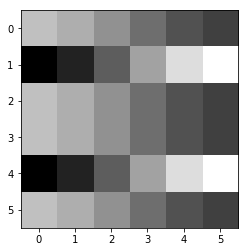

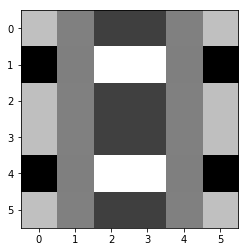

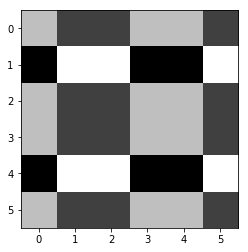

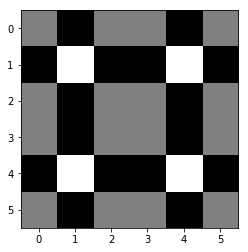

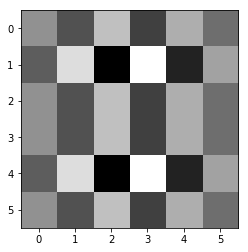

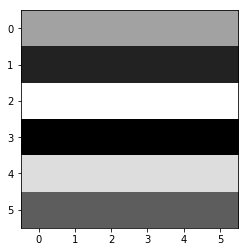

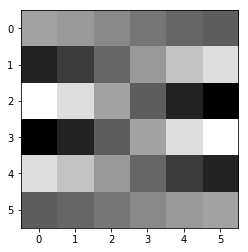

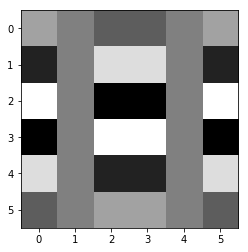

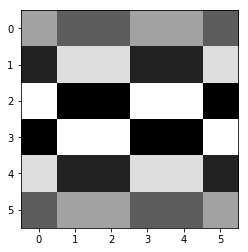

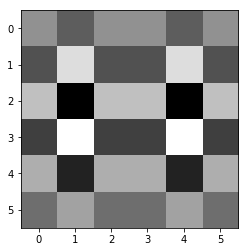

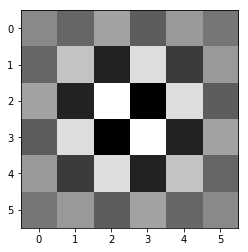

In [2]:
#Test Basis filter creation
#Shows the filters as images rather than convolutional opertations
frequencies = np.zeros((FoE.numBasisFilters, FoE.filterSize, FoE.filterSize))
for i in range(FoE.filterSize):
    for j in range(FoE.filterSize):
        frequencies[i*FoE.filterSize+j, i, j] = 1
print frequencies[14, :, :]

filters2D = fftpack.idct(fftpack.idct(frequencies, axis=1), axis=2)
for i in range(FoE.filterSize*FoE.filterSize):
    plt.imshow(filters2D[i], cmap='gray' )
    plt.show()

In [10]:
#Test conversion of filters to convolutional operators (matrices)
np.set_printoptions(threshold=np.nan)
#must flatten filters and convert to convolutional matrices
n = FoE.segmentSizeY
m = FoE.segmentSizeX
k = FoE.filterSize
outputSize = (n-k+1)*(m-k+1)
convMatrices = np.zeros((FoE.numBasisFilters, outputSize, n, m))
#assume convolution has no padding 
for i in range(outputSize):
    convMatrices[:, i, i/(m-k+1):i/(m-k+1)+k, i%(m-k+1):i%(m-k+1)+k] = filters2D
convMatrices[0]
convMatrices = convMatrices.reshape((FoE.numBasisFilters, outputSize, n*m))

beta = np.zeros((FoE.numFilters, FoE.numBasisFilters))
beta[0, 0] = 1
filters = np.tensordot(beta, convMatrices, axes=([1, 0]))
print filters[0, 9].reshape(n, m)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


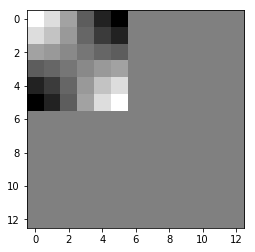

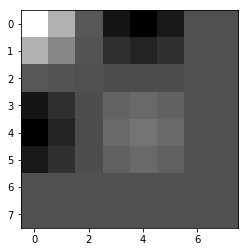

In [24]:
#Test filter convolutions on images
#Image that results from convolution should be brightest where filter overlaps with itself
import foe
import util

FoE = foe.FoE()
filterIndex = 7
frequencies = np.zeros((FoE.numBasisFilters, FoE.filterSize, FoE.filterSize))
for i in range(FoE.filterSize):
    for j in range(FoE.filterSize):
        frequencies[i*FoE.filterSize+j, i, j] = 1 
filterImages = fftpack.idct(fftpack.idct(frequencies, axis=1), axis=2)
filter = FoE.basisFilters[filterIndex]
fs = FoE.filterSize

#show filter
img = np.zeros((util.segmentHeight, util.segmentWidth))
img[:fs, :fs] = filterImages[filterIndex].reshape((fs, fs))
plt.imshow(img, cmap='gray')
plt.show()
img = img.reshape((-1, 1))

#show result of convolution
outputShape = (util.segmentHeight-fs+1, 
         util.segmentWidth-fs+1)
conv = np.matmul(filter, img)
plt.imshow(conv.reshape(outputShape), cmap='gray' )
plt.show()


In [11]:
#Test reading in the MRI Data
trueFile = './data/groundTruthData/t1_icbm_normal_1mm_pn0_rf0.mnc'
noisyFile = './data/noisyData/3pn/t1_icbm_normal_1mm_pn3_rf0.mnc'
import nibabel as nib
trueImg = nib.load(trueFile)
noisyImg = nib.load(noisyFile)
trueData = trueImg.get_data()
noisyData = noisyImg.get_data()

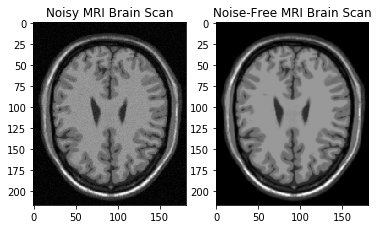

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(noisyData[100], cmap='gray' )
plt.title('Noisy MRI Brain Scan')
plt.subplot(1, 2, 2)
plt.title('Noise-Free MRI Brain Scan')
plt.imshow(trueData[100], cmap='gray' )
plt.show()

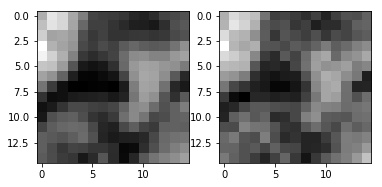

Break


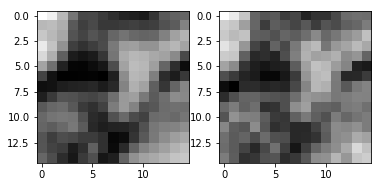

Break


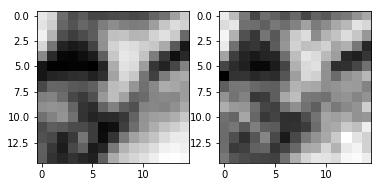

Break


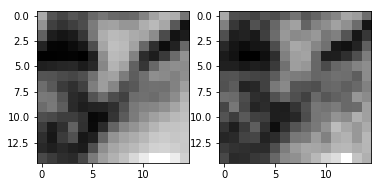

Break


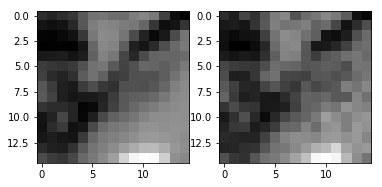

Break


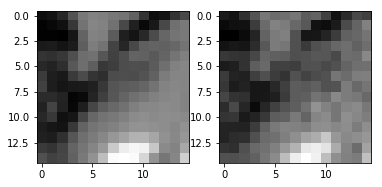

Break


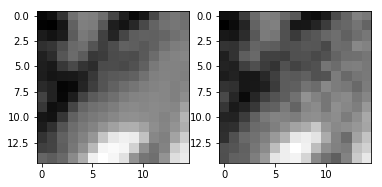

Break


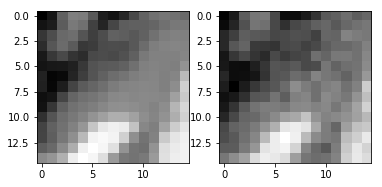

Break


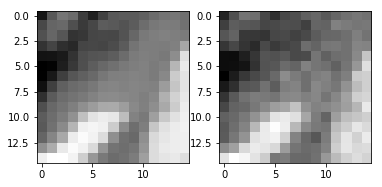

Break


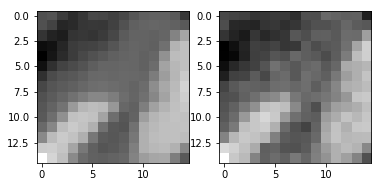

Break
Break


In [14]:
#Test the image segmentation and view the resulting segments
size = 15
for offset in range(50, 60):
    d = trueData
    plt.subplot(1, 2, 1)
    plt.imshow(d[0, offset:offset+size, offset:offset+size], cmap='gray' )
    plt.subplot(1, 2, 2)
    d = noisyData
    plt.imshow(d[0, offset:offset+size, offset:offset+size], cmap='gray' )
    plt.show()
    print 'Break'
#for d in noisyData[offset:offset+1]:
#    plt.imshow(d[:10, :10], cmap='gray' )
#    plt.show()
print 'Break'

In [17]:
#Test scipy's L-BFGS optimization function 
from scipy import optimize
import pdb
def E(x):
    return np.sum(x**2)
def dE(x):
    return 2*x
guessImage = np.ones((100, 1))
denoised, value, info = optimize.fmin_l_bfgs_b(E, guessImage, fprime=dE, disp=1)
print denoised #Should be all zeros

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [27]:
#check jacobain of energy from FoE model
import foe
import scipy
import numpy as np

FoE = foe.FoE()
shape = (FoE.segmentSizeY* FoE.segmentSizeY)
img1 = np.random.random(shape)
img2 = np.random.random(shape)
err = scipy.optimize.check_grad(FoE.E, FoE.jacE, img1, img2)
print 'Error between analytic and approximated FoE energy gradient: ',err



Error between analytic and approximated FoE energy gradient:  1.9175706739417442e-06


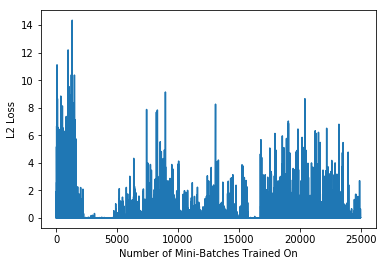

In [28]:
#Show the loss of a training run
import foe
import  matplotlib.pyplot as plt
filename = './output/3pn_pt3/model_3pn_2500.foe'
FoE = foe.load(filename)
loss = FoE.errorHistory
plt.plot(loss)
plt.xlabel('Number of Mini-Batches Trained On')
plt.ylabel('L2 Loss')
#plt.ylim((0, 50))
plt.show()